In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import OneClassSVM
%run Data_manipulation.ipynb

In [19]:
# one class SVM

def detect_anomalies_ocsvm(df, kernel='rbf', nu=0.1, gamma='auto'):
    """
    Detect anomalies in a time series using One-Class SVM.

    Parameters:
    - df: DataFrame containing the time series data with a 'Close' column.
    - kernel: Kernel type to be used in the algorithm.
    - nu: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
    - gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'.

    Returns:
    - anomalies: DataFrame containing the detected anomalies.
    """
    # Selecting the 'Close' column for anomaly detection
    data = df['Close'].values.reshape(-1, 1)

    # Initialize One-Class SVM
    ocsvm = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma)

    # Fit the model
    ocsvm.fit(data)

    # Predict anomalies
    anomaly_labels = ocsvm.predict(data)
    
    # Anomalies are labeled as -1
    anomalies = df[anomaly_labels == -1]

    # Plot the time series data
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomaly')
    plt.title('Time Series Data with Anomalies Detected using One-Class SVM')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    return anomalies


# NIFTY

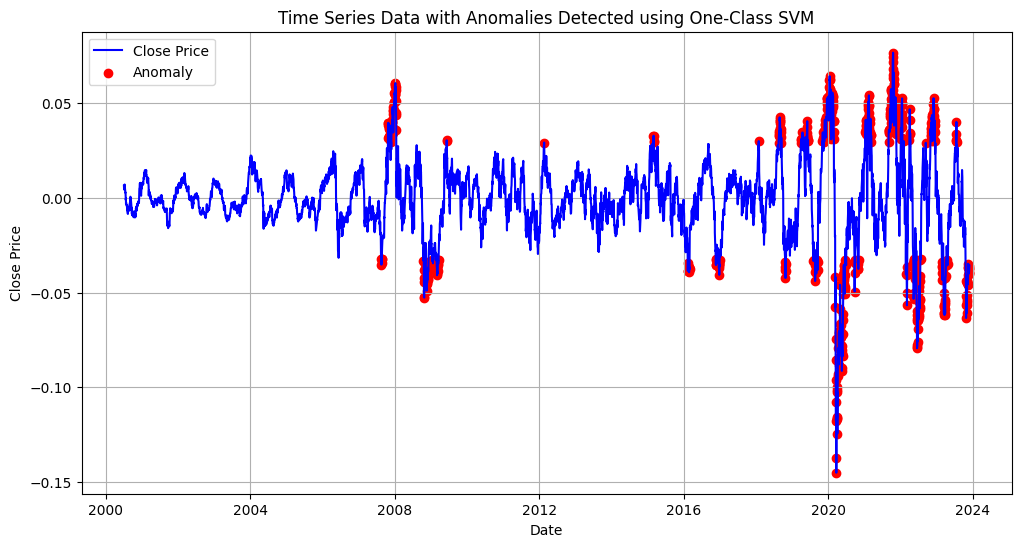

In [22]:
NIFTY = pd.read_csv('D:/UFG/Data collection/NIFTY.csv')
NIFTY['Date']= pd.to_datetime(NIFTY['Date'], format='%Y-%m-%d')
#NIFTY.set_index('Date', inplace=True)

scaled_data, scaler = scale_data(NIFTY)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_ocsvm(df_residuals)


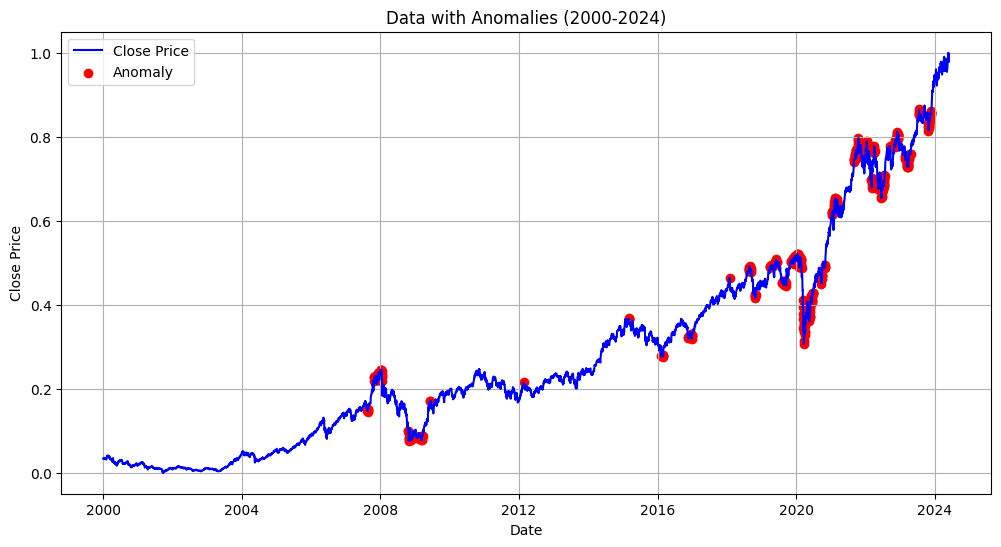

In [23]:
NIFTY_all = plot_with_anomalies(scaled_data, anomalies, 25)

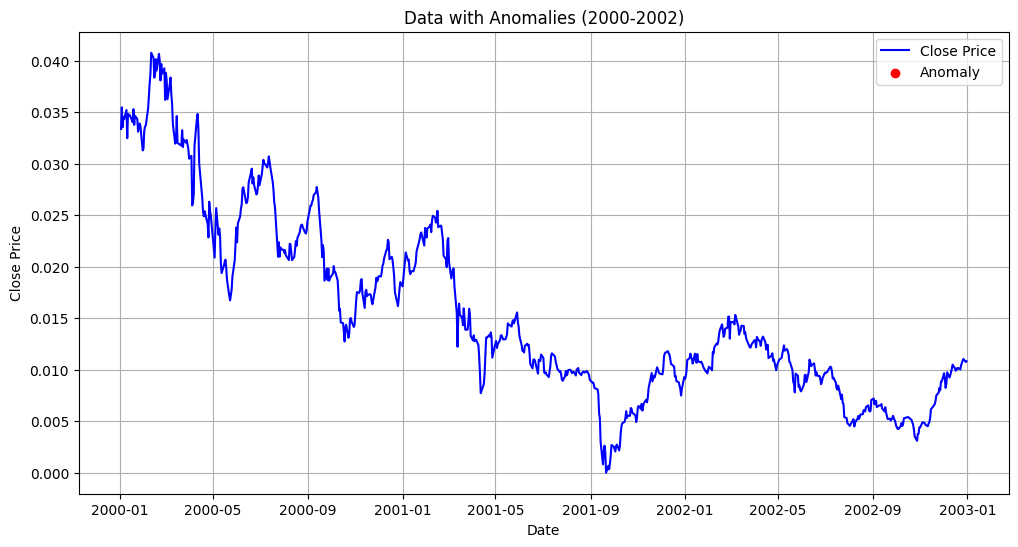

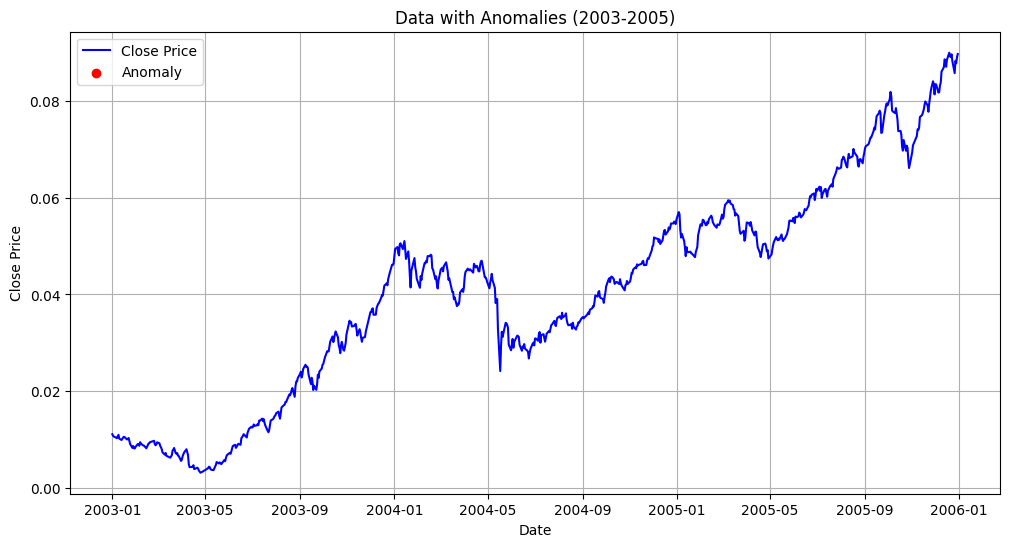

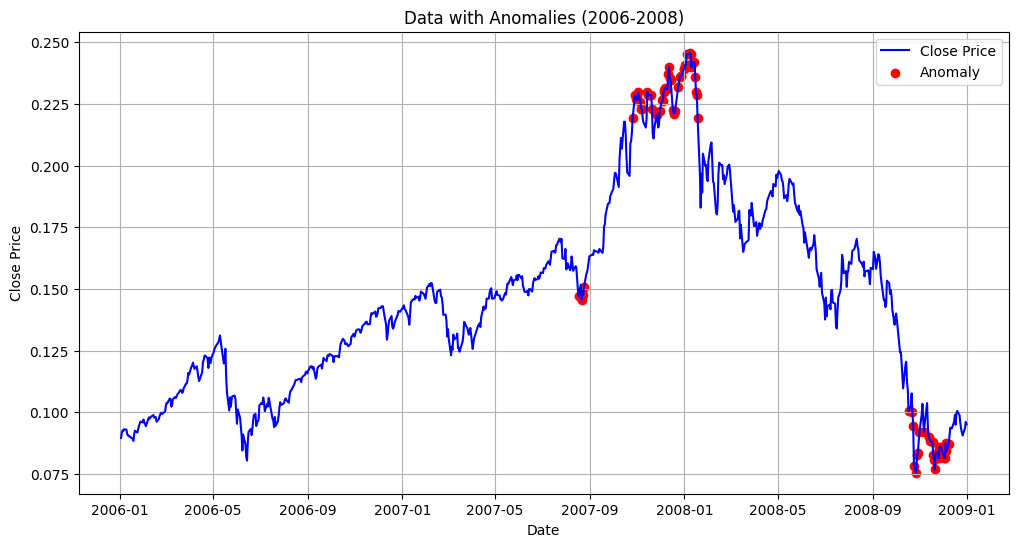

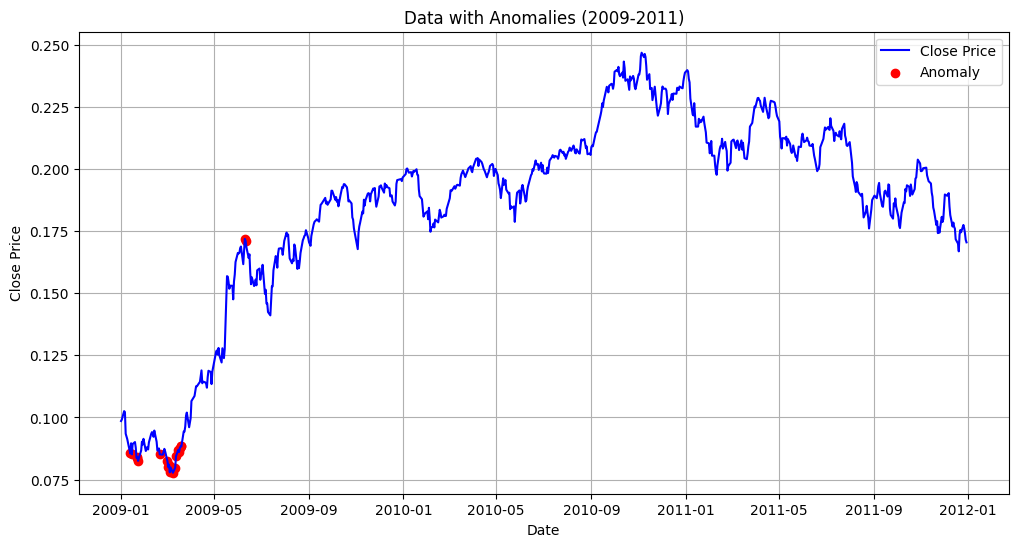

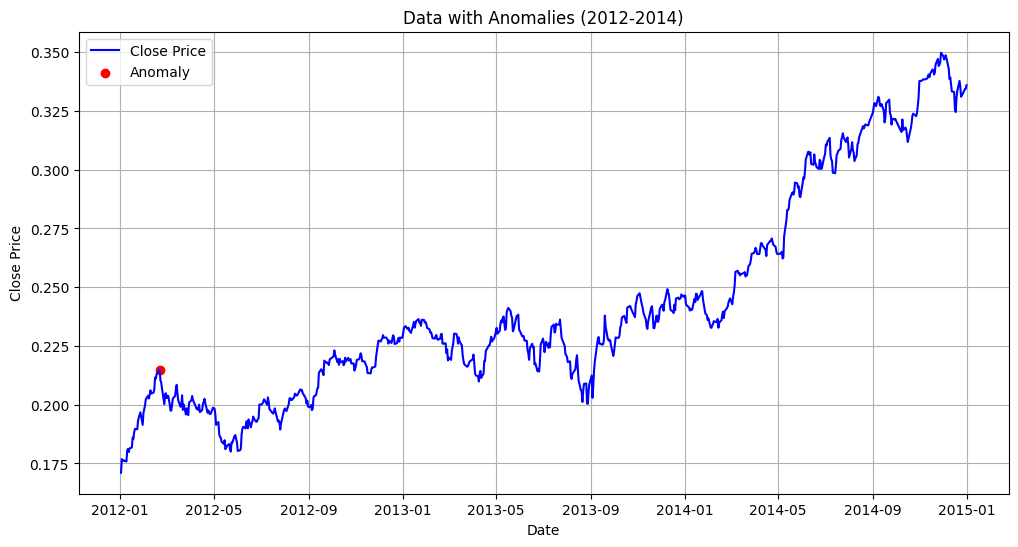

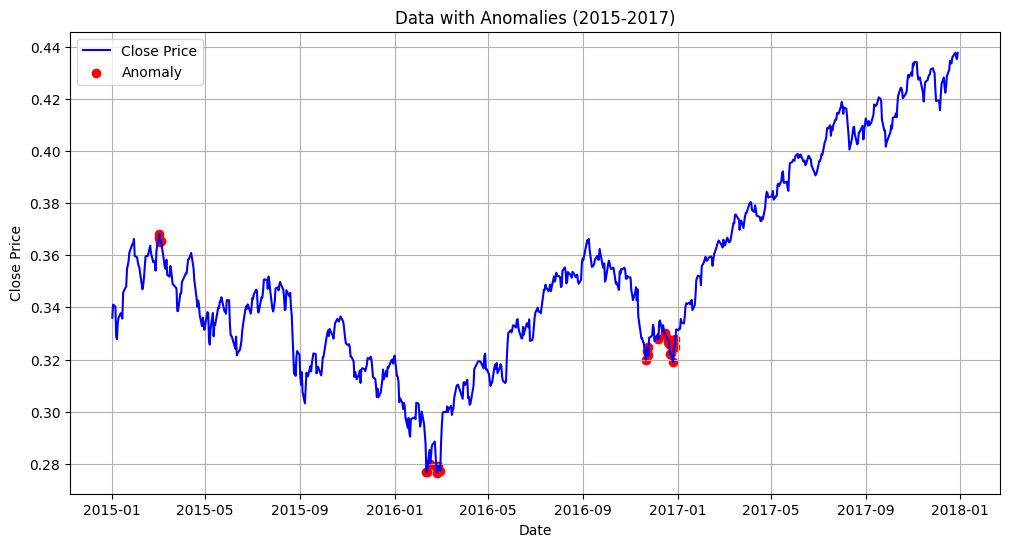

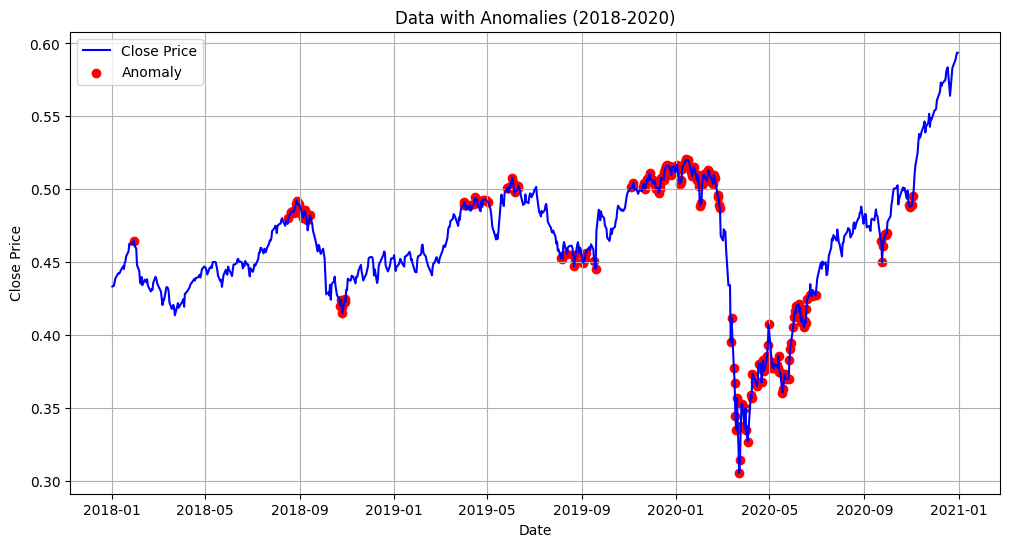

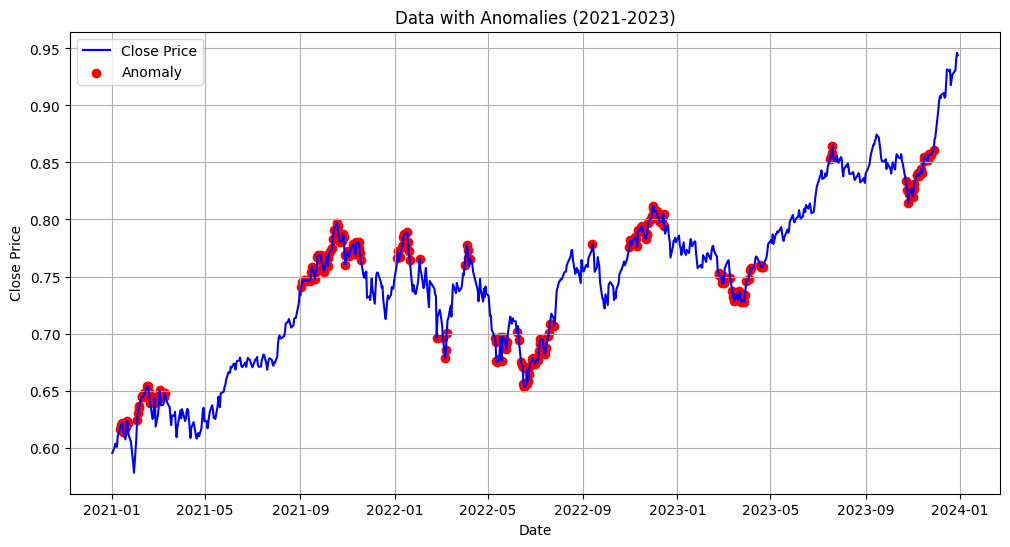

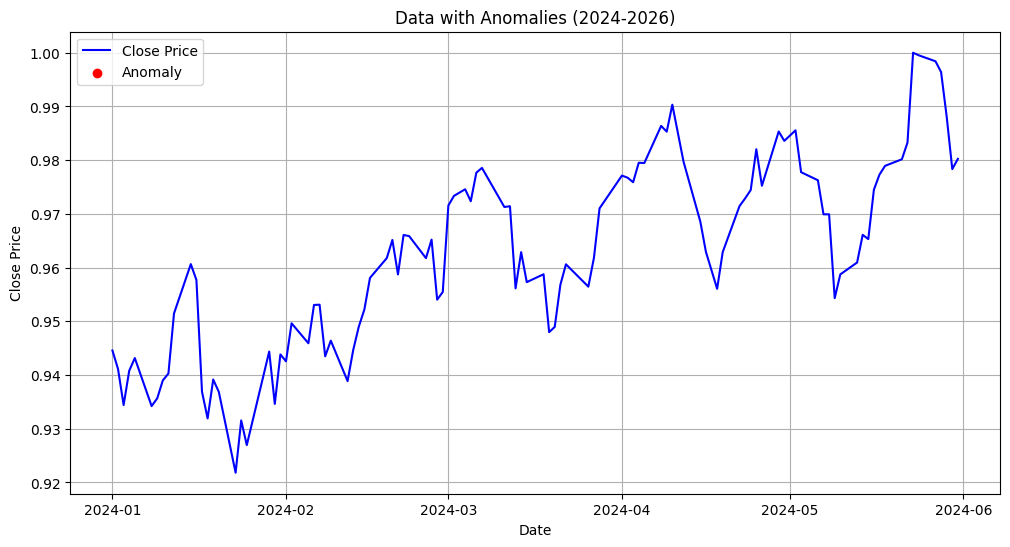

In [24]:
NIFTY_3 = plot_with_anomalies(scaled_data, anomalies, 3)

# IBOVESPA

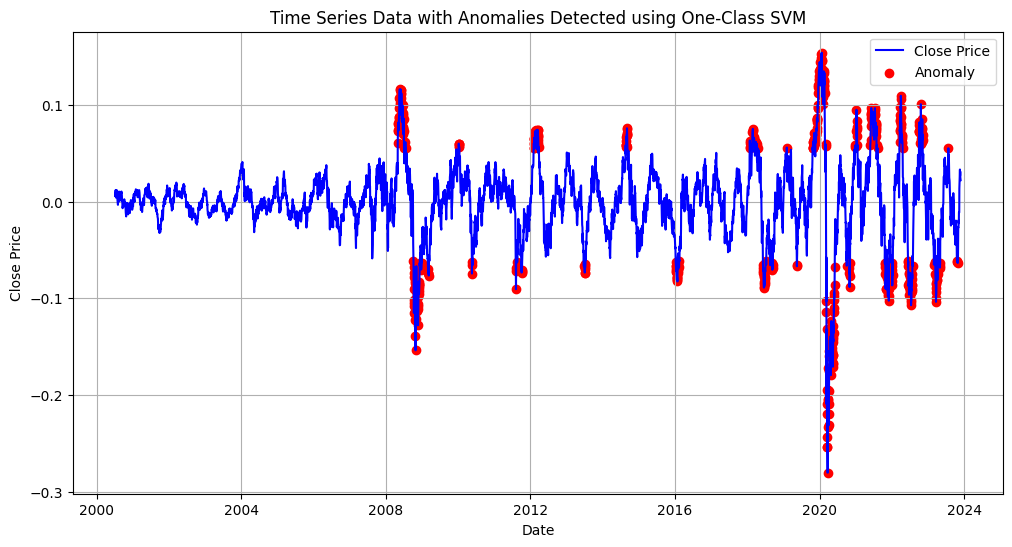

In [26]:
# Detecting anomaly
IBOV = pd.read_csv('D:/UFG/Data collection/IBOV.csv')
IBOV['Date']= pd.to_datetime(IBOV['Date'], format='%Y-%m-%d')

scaled_data, scaler = scale_data(IBOV)
df_residuals, df_trend, df_seasonal, decomposition_results = transform_to_stationary(scaled_data)

# Detect anomalies
anomalies = detect_anomalies_ocsvm(df_residuals)

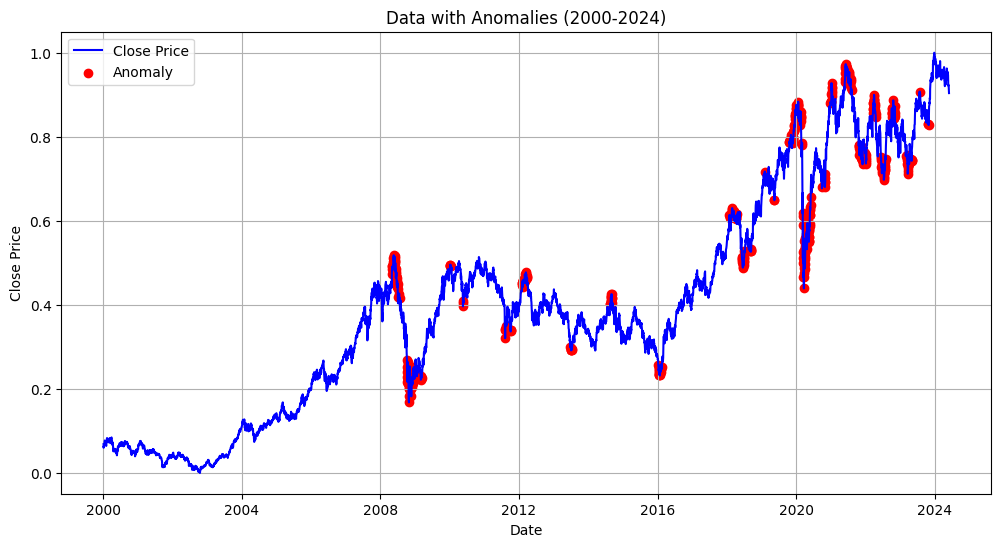

In [27]:
IBOV_all = plot_with_anomalies(scaled_data, anomalies, 25)

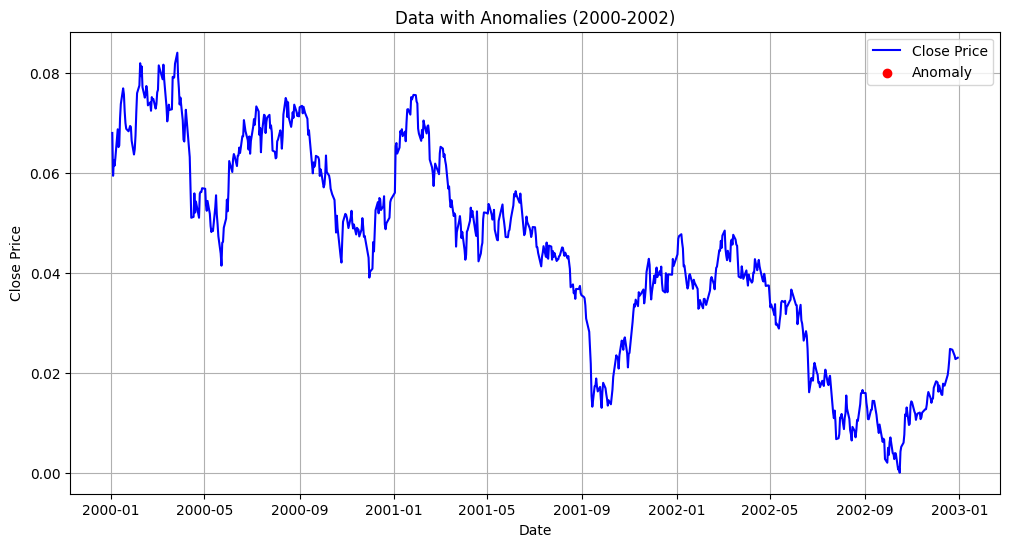

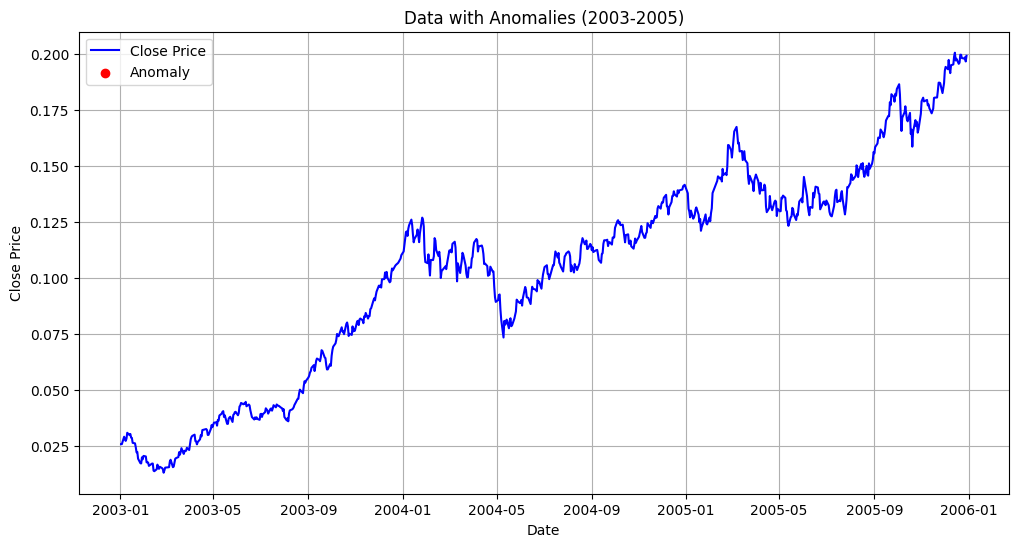

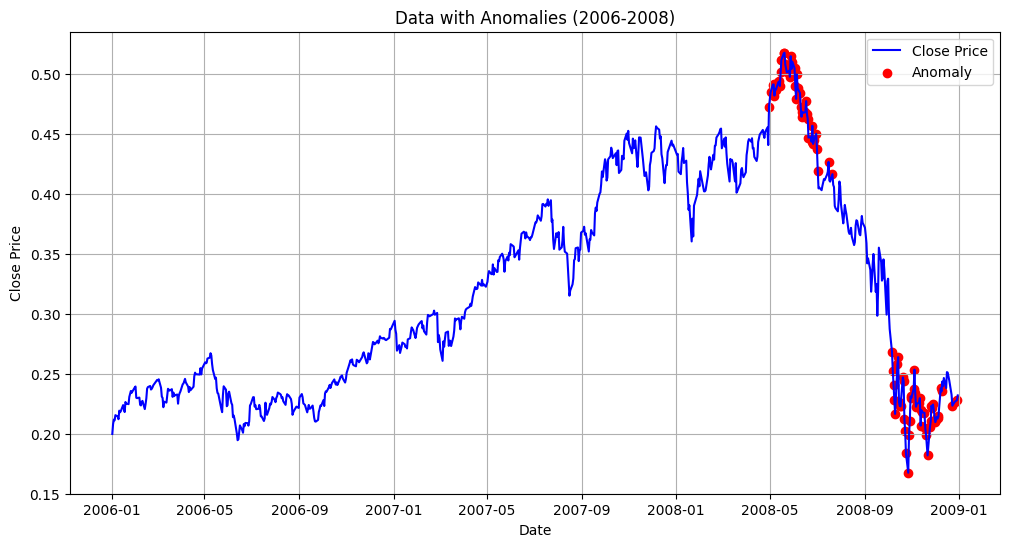

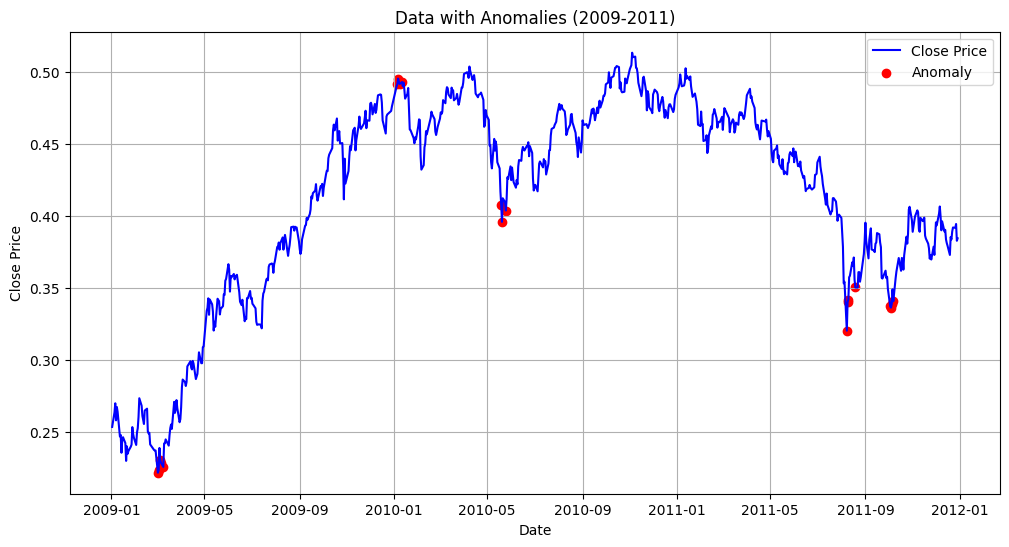

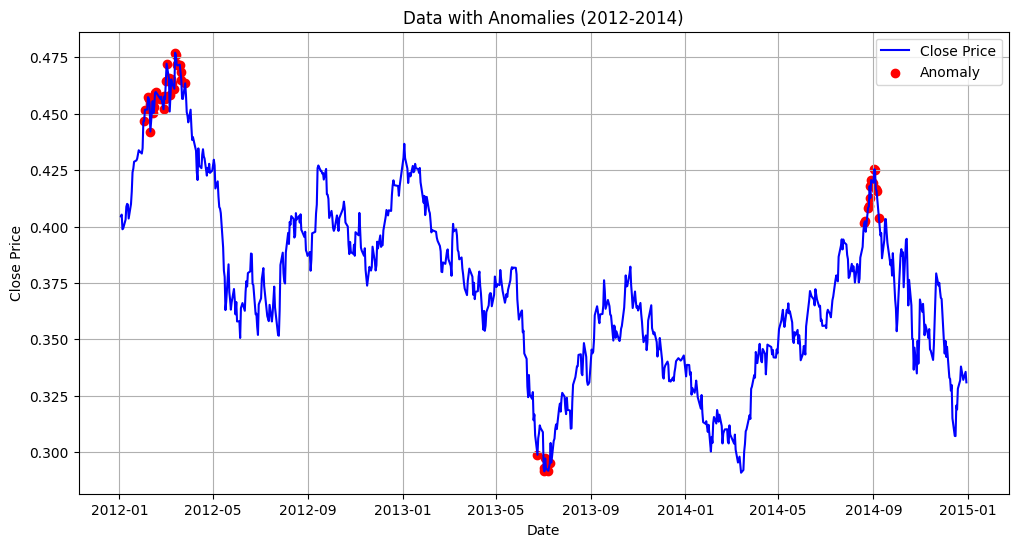

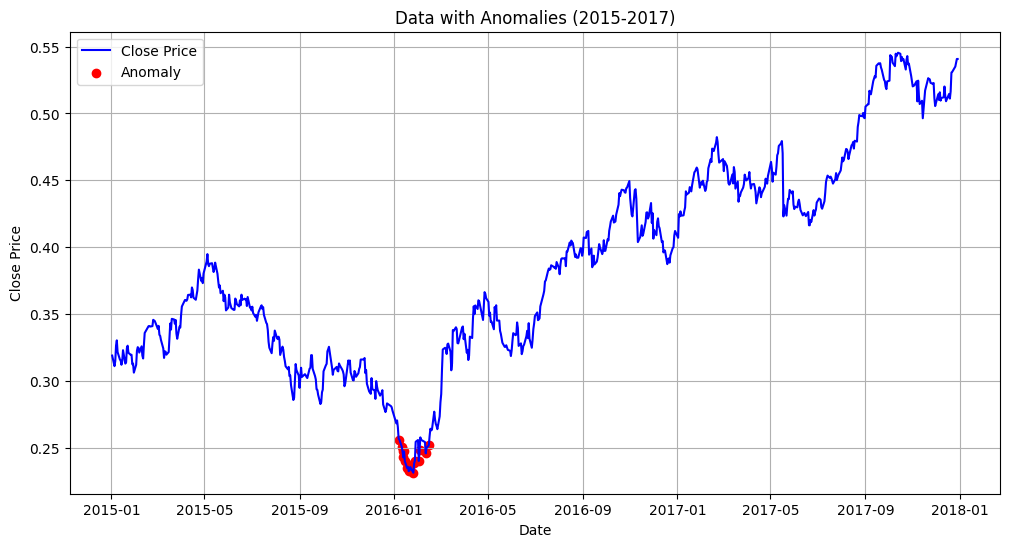

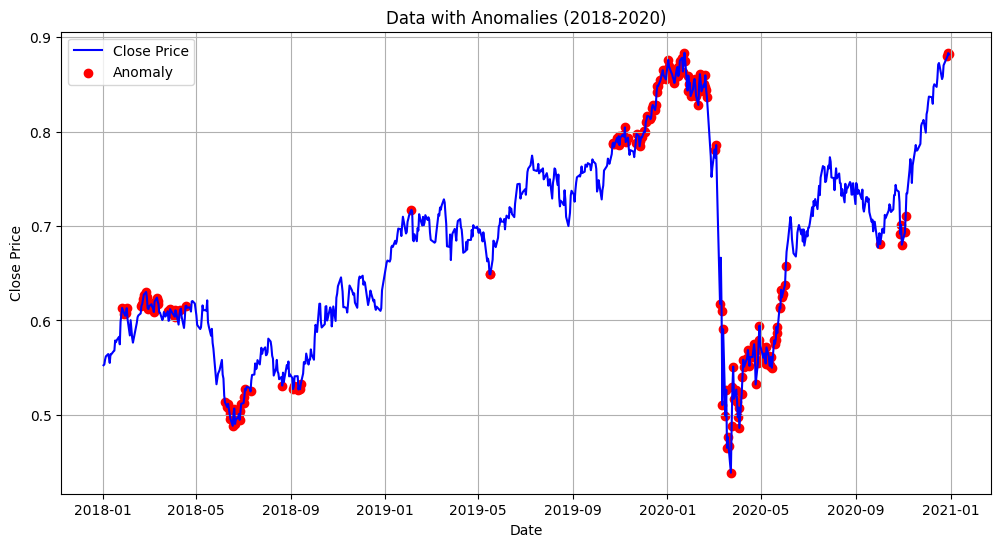

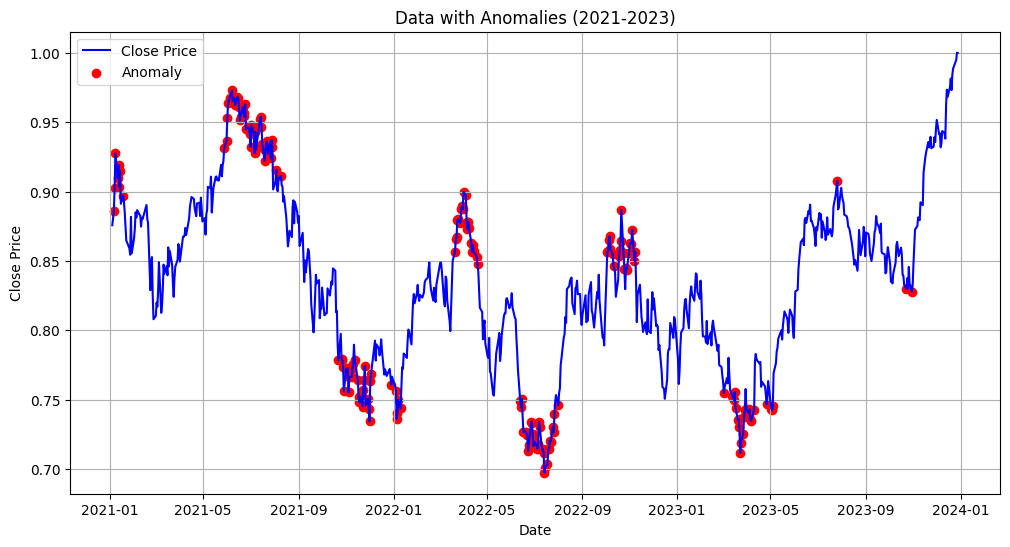

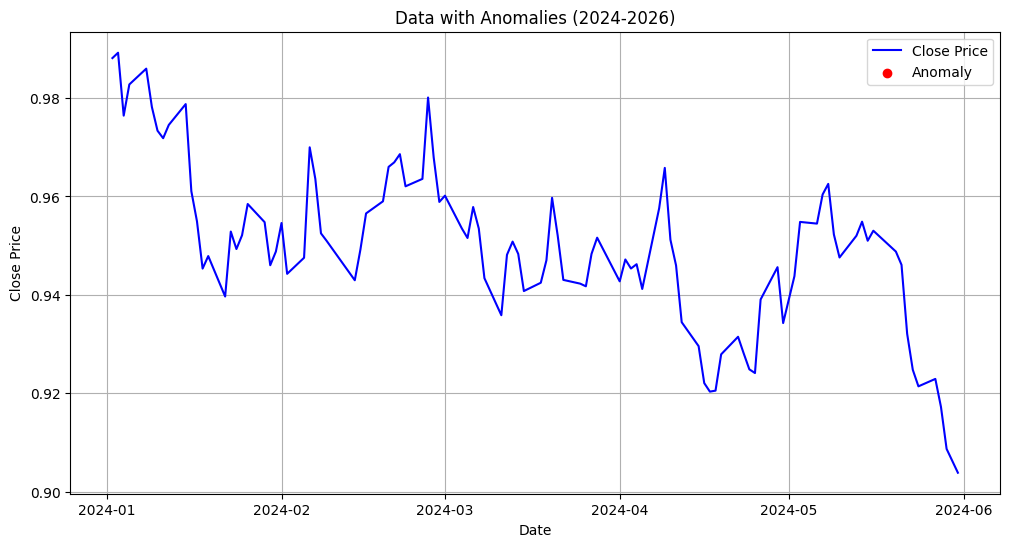

In [28]:
IBOV_3 = plot_with_anomalies(scaled_data, anomalies, 3)